# Russian Synodal Bible (1885)

## Import

### Libraries

In [3]:
#import os
#from lxml import etree
from backend import *

In [4]:
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

### Definitions

In [5]:
bibleTXT = './texts/bible/sinodalnyi-perevod.txt' 
booksJSON = './texts/bible/booksDict.json'
bibleJSON = './texts/bible/bible.json'
bibleIdJSON = './texts/bible/bibleID.json'
bibleXML = './texts/bible/bible.xml'
bibFrazyTXT = './texts/bible/Dubrovina_Slovar_Bibleyskikh_Frazeologizmov.txt'

bibleOHCO = ['test', 'book', 'chap', 'verse']
tokenCols = ['p_id', 'start', 'stop', 'text', 'token_id', 'head_id', 'rel', 'pos', 'lemma', 'anim', 'aspect', 'case', 'degree', 'gender', 'mood', 'number', 'person', 'tense', 'verb_form', 'voice']

chap_lines_re = '^===\s(\d{1,3})\s===$'
book_lines_re = '^==\s(.+)\s==$'
matt_name = 'От Матфея святое благовествование'

In [4]:
with open(booksJSON) as json_file: 
    booksDict = json.load(json_file)

## Pre-Processing

### Import Text into DF

### Tidy Up

### Find Parts

### Assign OHCO Labels

### Swap Full Book Name for Abbreviation

### Export to JSON

## Processing

### OHCO DFs

#### Testaments

#### Books

#### Chapters

### Make XML

## Token DFs

In [33]:
TokenDf = pd.read_pickle('./proc/BibleVerseTokenDf.pkl')#.set_index(['p_id', 'token_id'])
TokenDf

,p_id,start,stop,text,token_id,head_id,rel,pos,lemma,anim,aspect,case,degree,gender,mood,number,person,tense,verb_form,voice
0,1,0,1,В,1_1,1_2,case,ADP,в,None,None,None,None,None,None,None,None,None,None,None
1,1,2,8,начале,1_2,1_3,obl,NOUN,начало,Inan,None,Loc,None,Neut,None,Sing,None,None,None,None
2,1,9,17,сотворил,1_3,1_0,root,VERB,сотворить,None,Perf,None,None,Masc,Ind,Sing,None,Past,Fin,Act
3,1,18,21,Бог,1_4,1_3,nsubj,PROPN,бог,Anim,None,Nom,None,Masc,None,Sing,None,None,None,None
4,1,22,26,небо,1_5,1_3,obj,NOUN,небо,Inan,None,Acc,None,Neut,None,Sing,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,37110,32,38,Христа,1_5,1_4,flat:name,PROPN,христос,Anim,None,Gen,None,Masc,None,Sing,None,None,None,None
5,37110,39,41,со,1_6,1_8,case,ADP,с,None,None,None,None,None,None,None,None,None,None,None
6,37110,42,47,всеми,1_7,1_8,det,DET,весь,None,None,Ins,None,None,None,Plur,None,None,None,None
7,37110,48,52,вами,1_8,1_4,nmod,PRON,вы,None,None,Ins,None,None,None,Plur,2,None,None,None


In [6]:
#ChapsTokenDf = pd.read_pickle('./proc/BibleChapsTokenDf.pkl')
#ChapsTokenDf

In [51]:
GetRankDf('lemma', stop=True)[:50]#.plot(x='rank')

,n,rank
lemma,,
он,19656,1
они,12325,2
быть,10839,3
я,10762,4
ты,7851,5
господь,7101,6
весь,6982,7
свой,6038,8
твой,5958,9


In [9]:
GetRankDf('pos')

,n,rank
pos,,
NOUN,147028,1
VERB,108063,2
PRON,78480,3
ADP,70754,4
CCONJ,63398,5
PROPN,55336,6
ADJ,35327,7
DET,34131,8
PART,23999,9


In [10]:
GetRankDf('rel')

,n,rank
rel,,
case,71010,1
nsubj,63995,2
cc,63839,3
conj,61390,4
obl,56899,5
obj,53924,6
nmod,44289,7
advmod,42893,8
root,42520,9


In [20]:
GetRankDf('anim')

,n,rank
anim,,
Inan,145289,1
Anim,83455,2


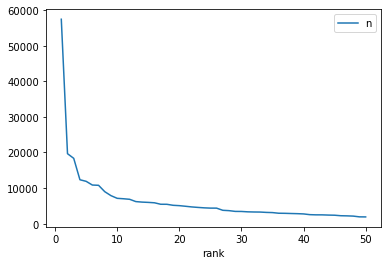

In [57]:
VocabDf.iloc[:50].plot(x='rank');

## Bible Phrase Dictionary

In [172]:
with open(bibFrazyTXT) as bibleFrazy: 
    bibleFrazyLines = bibleFrazy.readlines()

In [175]:
BibleFrazyDf = pd.DataFrame(bibleFrazyLines).rename(columns={0:'fraza'})
BibleFrazyDf.loc[:,'fraza'] = BibleFrazyDf.loc[:,'fraza'].apply(lambda x: x.strip().strip('\n'))
BibleFrazyDf = BibleFrazyDf.loc[BibleFrazyDf.fraza != '']
BibleFrazyDf.loc[112:30185]

,fraza
112,"Агнец Божий (непорочный); как (будто, как будт..."
113,точно) агнец <Божий>. Книжн.
114,"1. Кроткий, чистый, невинный, смиренный, послу..."
115,"@[Мефистофель:] И знаешь ли, философ мой, / Чт..."
116,"время, / Когда не думает никто?.. / Ты думал: ..."
...,...
30181,гим и чтобы не увидели срамоты его» (Откр. 16:...
30182,Ст.-слав. тать – ‘вор’. В современном русском ...
30183,"стоятельно не употребляется, однако сохранилос..."
30184,"качестве корня, например, в фамилии Татищев, в..."


In [181]:
BibleFrazyDf.loc[30189:].fraza.to_list()301853018530185

['Агнец Божий (непорочный); как (будто, как будто, словно, точно) агнец <Божий>.',
 'Адамова голова.',
 'Адамово яблоко.',
 'Адамовы веки (времена).',
 'Адамовы слёзы.',
 'Ад кромешный.',
 'Ад кромешный на душе (на сердце) у кого.',
 'Аллилуйю петь кому.',
 'Алчущие и жаждущие.',
 'Альфа и омега чего.',
 'Аредовы веки (жить / прожить).',
 'А судьи кто?',
 'Бальзам на рану [на раны, для раны] (на душу, на сердце) <лить, проливать / пролить>.',
 'Башня из слоновой кости.',
 'Беда <никогда> не приходит одна.',
 'Беден как Иов.',
 'Беден как Лазарь. Бедный Лазарь.',
 'Бездна бездну призывает.',
 'Бездна (кладезь) премудрости.',
 'Белые одежды.',
 'Бесплодная смоковница.',
 'Бить (колотить, ударять) себя в грудь.',
 'Благую часть избрать.',
 'Блажен, кто верует, <тепло ему на свете>.',
 'Блажен муж, иже не иде на совет нечестивых.',
 'Блаженны миротворцы, <ибо они будут наречены сынами Божиими>.',
 'Блаженны нищие духом, <ибо их есть Царство Небесное>.',
 'Блудный сын.',
 'Бог дал, Бог <и> 

In [168]:
BibleFrazyDf.loc[34064].fraza

'В чужом глазу сучок (соломинку) видим, а в своём <и> бревна не заме!'

In [159]:
BibleFrazyDf.loc[33944:].fraza.loc[BibleFrazyDf.fraza.str.match('^[а-я]', case=True)].to_frame()

,fraza
33945,нец <Божий>.
33959,ливать / пролить>.
33983,"мень [камнем; каменья, каменьями] (грязью) в к..."
34041,лись) дыбом у кого.
34044,скорбь.
34048,го> сердца). По простоте своей.
34065,чаем.
34126,"последним, смертным) сном."
34160,красный>].
34163,дух.


In [ ]:
BibleFrazyDf.loc[33944:].fraza.loc[BibleFrazyDf.fraza.str.match('^\s')]

Series([], Name: fraza, dtype: object)

In [176]:
FrazyAbbrsDf = BibleFrazyDf.iloc[:105].fraza.str.split(' – ', expand=True).rename(columns={0:"abbr", 1:"fraza"})
FrazyAbbrsDf.loc[:,'abbr'] = FrazyAbbrsDf.loc[:,'abbr'].apply(lambda x: x.strip())
FrazyAbbrsDf.loc[:,'fraza'] = FrazyAbbrsDf.loc[:,'fraza'].apply(lambda x: x.strip())
FrazyAbbrsDict = FrazyAbbrsDf.set_index('abbr').to_dict().get('fraza')